# Options Calculator with Binomial model

Binomial model is arguably the simplest techniques used for option pricing. In this calculator, the options price will be calculated by two binomial-tree methods,Cox-Ross-Rubinstein and Jarrow-Rudd (the equal-probability model). 

Each of the approaches has its advantages and disadvantages for pricing different types of options. However, they all involve a similar tree-step process.

* There are only two possible prices for the underlying asset on the next day.
* The two possible prices are the up-price and down-price
* No dividends are paid out during the option’s life.
* The risk-free rate is constant throughout the life of the option
* There are no transaction and commissions costs in buying the option.
* Investors are risk neutral


#### ** All trees are built from four parameters (u, d, p and q). 
- The parameters u and d are how much the underlying will go up or down in each discrete time. 
- The parameters p and q are the probabilities for the price to go up and down respectively. Moreover, assume p+q=1.




#### ** Note that the model assumes that the price of the equity underlying the option follows a random walk.

#### Input variables:
  * Underlying price (per share): S; 
  * Strike price of the option (per share): K;
  * Time to maturity (years): T;
  * Continuously compounding risk-free interest rate: r;
  * Volatility: sigma;
  * Number of binomial steps: N

In [1]:
## import certain packages
import math
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
## define Cox_Ross_Rubinstein binomial model
def Cox_Ross_Rubinstein_Tree (S,K,T,r,sigma,N, Option_type):
    
    # Underlying price (per share): S; 
    # Strike price of the option (per share): K;
    # Time to maturity (years): T;
    # Continuously compounding risk-free interest rate: r;
    # Volatility: sigma;
    # Number of binomial steps: N;

        # The factor by which the price rises (assuming it rises) = u ;
        # The factor by which the price falls (assuming it falls) = d ;
        # The probability of a price rise = pu ;
        # The probability of a price fall = pd ;
        # discount rate = disc ;
    
    u=math.exp(sigma*math.sqrt(T/N));
    d=math.exp(-sigma*math.sqrt(T/N));
    pu=((math.exp(r*T/N))-d)/(u-d);
    pd=1-pu;
    disc=math.exp(-r*T/N);

    St = [0] * (N+1)
    C = [0] * (N+1)
    
    St[0]=S*d**N;
    
    for j in range(1, N+1): 
        St[j] = St[j-1] * u/d;
    
    for j in range(1, N+1):
        if Option_type == 'P':
            C[j] = max(K-St[j],0);
        elif Option_type == 'C':
            C[j] = max(St[j]-K,0);
    
    for i in range(N, 0, -1):
        for j in range(0, i):
            C[j] = disc*(pu*C[j+1]+pd*C[j]);
            
    return C[0]


## define Jarrow_Rudd binomial model    
def Jarrow_Rudd_Tree (S,K,T,r,sigma,N, Option_type):

    # Underlying price (per share): S; 
    # Strike price of the option (per share): K;
    # Time to maturity (years): T;
    # Continuously compounding risk-free interest rate: r;
    # Volatility: sigma;
    # Steps: N;
    
        # The factor by which the price rises (assuming it rises) = u ;
        # The factor by which the price falls (assuming it falls) = d ;
        # The probability of a price rise = pu ;
        # The probability of a price fall = pd ;
        # discount rate = disc ;
        
    u=math.exp((r-(sigma**2/2))*T/N+sigma*math.sqrt(T/N));
    d=math.exp((r-(sigma**2/2))*T/N-sigma*math.sqrt(T/N));
    pu=0.5;
    pd=1-pu;
    disc=math.exp(-r*T/N);

    St = [0] * (N+1)
    C = [0] * (N+1)
    
    St[0]=S*d**N;
    
    for j in range(1, N+1): 
        St[j] = St[j-1] * u/d;
    
    for j in range(1, N+1):
        if Option_type == 'P':
            C[j] = max(K-St[j],0);
        elif Option_type == 'C':
            C[j] = max(St[j]-K,0);
    
    for i in range(N, 0, -1):
        for j in range(0, i):
            C[j] = disc*(pu*C[j+1]+pd*C[j]);
            
    return C[0]

##### Input

In [33]:
## input the current stock price and check if it is a number.
S = input("What is the current stock price? ");
while True:
    try:
        S = float(S)
        break
    except:
        print("The current stock price has to be a NUMBER.")
        S = input("What is the current stock price? ")

## input the strike price and check if it is a number.
K = input("What is the strike price? ");
while True:
    try:
        K = float(K)
        break
    except:
        print("The the strike price has to be a NUMBER.")
        K = input("What is the strike price? ")


## input the expiration_date and calculate the days between today and the expiration date.
while True:
    expiration_date = input("What is the expiration date of the options? (mm-dd-yyyy) ")
    try:
        expiration_date = datetime.strptime(expiration_date, "%m-%d-%Y")
    except ValueError as e:
        print("error: %s\nTry again." % (e,))
    else:
        break
T = (expiration_date - datetime.utcnow()).days / 365


## input the continuously compounding risk-free interest rate and check if it is a number.
r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ");
while True:
    try:
        r = float(r)
        break
    except:
        print("The continuously compounding risk-free interest rate has to be a NUMBER.")
        r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ")
        

## input the volatility and check if it is a number.
sigma = input("What is the volatility in percentage(%)? "); 
while True:
    try:
        sigma = float(sigma)
        if sigma > 100 or sigma < 0:
            print ( "The range of sigma has to be in [0,100].")
            sigma = input("What is the volatility in percentage(%)? ")
        break
    except:
        print("The volatility has to be a NUMBER.")
        sigma = input("What is the volatility in percentage(%)? ")

What is the current stock price? 100
What is the strike price? 110
What is the expiration date of the options? (mm-dd-yyyy) 3-1-2020
What is the continuously compounding risk-free interest rate in percentage(%)? 5
What is the volatility in percentage(%)? 30


In [34]:
data = {'Symbol': ['S', 'K', 'T', 'r', 'sigma'],
        'Input': [S, K, T , r , sigma]}
input_frame = DataFrame(data, columns=['Symbol', 'Input'], 
                   index=['Underlying price', 'Strike price', 'Time to maturity', 'Risk-free interest rate', 'Volatility'])
input_frame

,Symbol,Input
Underlying price,S,100.000000
Strike price,K,110.000000
Time to maturity,T,2.221918
Risk-free interest rate,r,5.000000
Volatility,sigma,30.000000


##### Output

In [35]:
r = r/100; sigma = sigma/100;
binomial_model_pricing = {'Option' : ['Call', 'Put', 'Call', 'Put'],
                          'Price': [Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,1000,'C'), Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,1000,'P'),
                                     Jarrow_Rudd_Tree(S, K, T, r, sigma,1000,'C'), Jarrow_Rudd_Tree(S, K, T, r, sigma,1000,'P')]}
binomial_model_pricing_frame = DataFrame(binomial_model_pricing, columns=[ 'Option', 'Price'], 
                   index = ['Cox-Ross-Rubinstein','Cox-Ross-Rubinstein', 'Jarrow-Rudd', 'Jarrow-Rudd'])                                        
binomial_model_pricing_frame

,Option,Price
Cox-Ross-Rubinstein,Call,18.350952
Cox-Ross-Rubinstein,Put,16.784775
Jarrow-Rudd,Call,18.343573
Jarrow-Rudd,Put,16.777730


##### Plot call / put options price with different steps

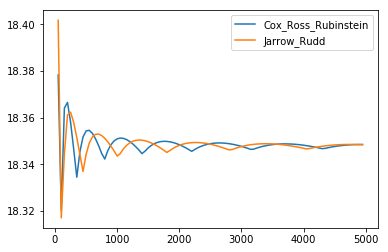

In [36]:
## call option with different steps 
runs1 = list(range(50,5000,50))
CRR1 = []
JR1 = []

for i in runs1:
    CRR1.append(Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,i ,'C'))
    JR1.append(Jarrow_Rudd_Tree(S, K, T, r, sigma,i ,'C'))

plt.plot(runs1, CRR1, label='Cox_Ross_Rubinstein')
plt.plot(runs1, JR1, label='Jarrow_Rudd')
plt.legend(loc='upper right')
plt.show()

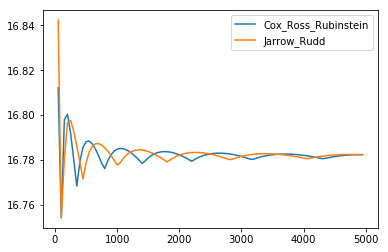

In [37]:
## put option with different steps 
runs2 = list(range(50,5000,50))
CRR2 = []
JR2 = []

for i in runs2:
    CRR2.append(Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,i ,'P'))
    JR2.append(Jarrow_Rudd_Tree(S, 110, T, r, sigma,i ,'P'))

plt.plot(runs2, CRR2, label='Cox_Ross_Rubinstein')
plt.plot(runs2, JR2, label='Jarrow_Rudd')
plt.legend(loc='upper right')
plt.show()